Please remember that in order to run the code in this notebook you must have either already fit your own LSTM and AutoML models and gotten diagnostic statistics or imported the ones from my GitHub

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
analysis_years = list(range(2003, 2018))

# Load models

## LSTM

In [133]:
with open('lstm/sufficient_info.json') as json_file:
    lstm_info = json.load(json_file)

## AutoML

In [134]:
with open('automl/sufficient_info.json') as json_file:
    automl_info = json.load(json_file)

## Bayes

In [152]:
with open('bayes/sufficient_info.json') as json_file:
    bayes_info = json.load(json_file)

# Plot residuals

In [153]:
xmin = 0
xmax = 0.8

In [154]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

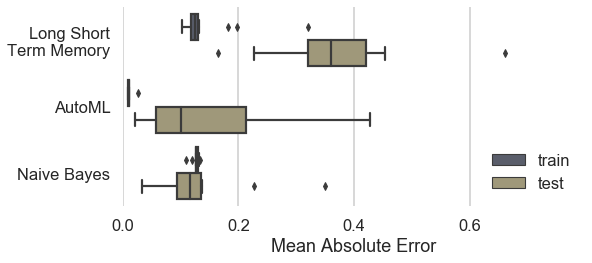

In [155]:
# prep data
lstm_train_mae = [lstm_info[key]['train_mae'] for key in lstm_info.keys()]
automl_train_mae = [automl_info[key]['train_mae'] for key in automl_info.keys()]
bayes_train_mae = [bayes_info[key]['train_mae'] for key in bayes_info.keys()]

lstm_test_mae = [lstm_info[key]['test_mae'] for key in lstm_info.keys()]
automl_test_mae = [automl_info[key]['mae'] for key in automl_info.keys()]
bayes_test_mae = [bayes_info[key]['test_mae'] for key in bayes_info.keys()]

train_test = ['train'] * 15 + ['test'] * 15

train = pd.DataFrame({
    'Long Short\nTerm Memory': lstm_train_mae + lstm_test_mae,
    'AutoML': automl_train_mae + automl_test_mae,
    'Naive Bayes': bayes_train_mae + bayes_test_mae,
    'train_test': train_test
})
plotdata = pd.melt(train, id_vars=['train_test'], value_vars=['Long Short\nTerm Memory', 'AutoML', 'Naive Bayes'])
# value_vars=['lstm', 'automl', 'bayes'])
# plot
fig, ax = plt.subplots()

# base plot
ax = sns.boxplot(x="value", y="variable",
                 hue='train_test', data=plotdata,
                 linewidth=2.2, palette='cividis')
# sns.stripplot(x='value', y='variable', 
#               hue='train_test', data=plotdata,
#               ax=ax, orient='h', color=".5", dodge=True)

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

plt.tight_layout()
fig.set_figwidth(10)
fig.savefig('residuals.png', dpi=900, transparent=True)

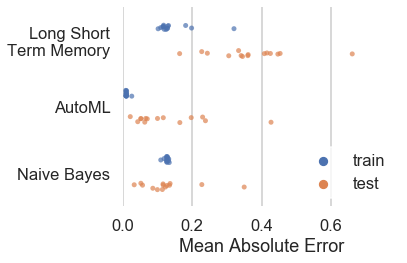

In [156]:
# plot
fig, ax = plt.subplots()

# base plot
sns.stripplot(x='value', y='variable', 
              hue='train_test', data=plotdata,
              ax=ax, orient='h', alpha=0.7, dodge=True,
              palette='deep')

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

plt.tight_layout()
fig.savefig('residuals.png', dpi=300, transparent=True)

In [157]:
actual_info

{'2003': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.05,
  0.05263157894736842,
  0.09774436090225563,
  0.14285714285714285,
  0.33333333333333337,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238,
  0.5238095238095238],
 '2004': [0.0,
  0.00819672131147541,
  0.01639344262295082,
  0.0,
  0.0,
  0.0,
  0.18333333333333332,
  0.36666666666666664,
  0.55,
  0.5862068965517241,
  2.0,
  1.5862068965517242,
  3.4,
  4.351785714285715,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429,
  5.303571428571429],
 '2005': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019230769230769232,
  0.08,
  0.29411764705882354,
  0.2830188679245283,
  0.4230769230769231,
  0.56,
  0.125,
  0.3194444444444444,
  0.5138888888888888,
  0.7083333333333334,
  0.708333333

# Plot forecasts

In [158]:
def retrieve_dates_lstm(inputs):
    return(inputs[4:])

In [159]:
def retrieve_dates_automl(inputs):
    return(inputs[9:-4])

In [160]:
with open('bayes/actual_values.json') as json_file:
    actual_info = json.load(json_file)

In [161]:
lstm_info

{'2003': {'train_mse': 0.14243848634588846,
  'test_mse': 0.35087294090404847,
  'train_mae': 0.19829206032769434,
  'test_mae': 0.42543852216848665,
  'test_predictions_scaled': [[0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.2619626224040985],
   [0.10023704916238785],
   [0.03840338811278343],
   [0.04297543317079544],
   [0.07151611149311066],
   [0.07572882622480392],
   [0.09674784541130066],
   [0.167718768119812],
   [0.21504810452461243],
   [0.23800496757030487],
   [0.24932627379894257],
   [0.25516676902770996],
   [0.25825875997543335],
   [0.2599244713783264],
   [0.2608335316181183],
   [0.2613355219364166]],
  'test_predictions_unscaled': [[0.0002208803198300302],
   [0.0002208803198300302],
   [0.0002208803198300302],
   [0.0002208803198300302],
   [0.000220880319830

In [162]:
import numpy as np
from itertools import chain

In [163]:
plotdata

,train_test,variable,value
0,train,Long Short\nTerm Memory,0.198292
1,train,Long Short\nTerm Memory,0.115388
2,train,Long Short\nTerm Memory,0.181155
3,train,Long Short\nTerm Memory,0.124783
4,train,Long Short\nTerm Memory,0.128992
...,...,...,...
85,test,Naive Bayes,0.114021
86,test,Naive Bayes,0.086549
87,test,Naive Bayes,0.349925
88,test,Naive Bayes,0.115974


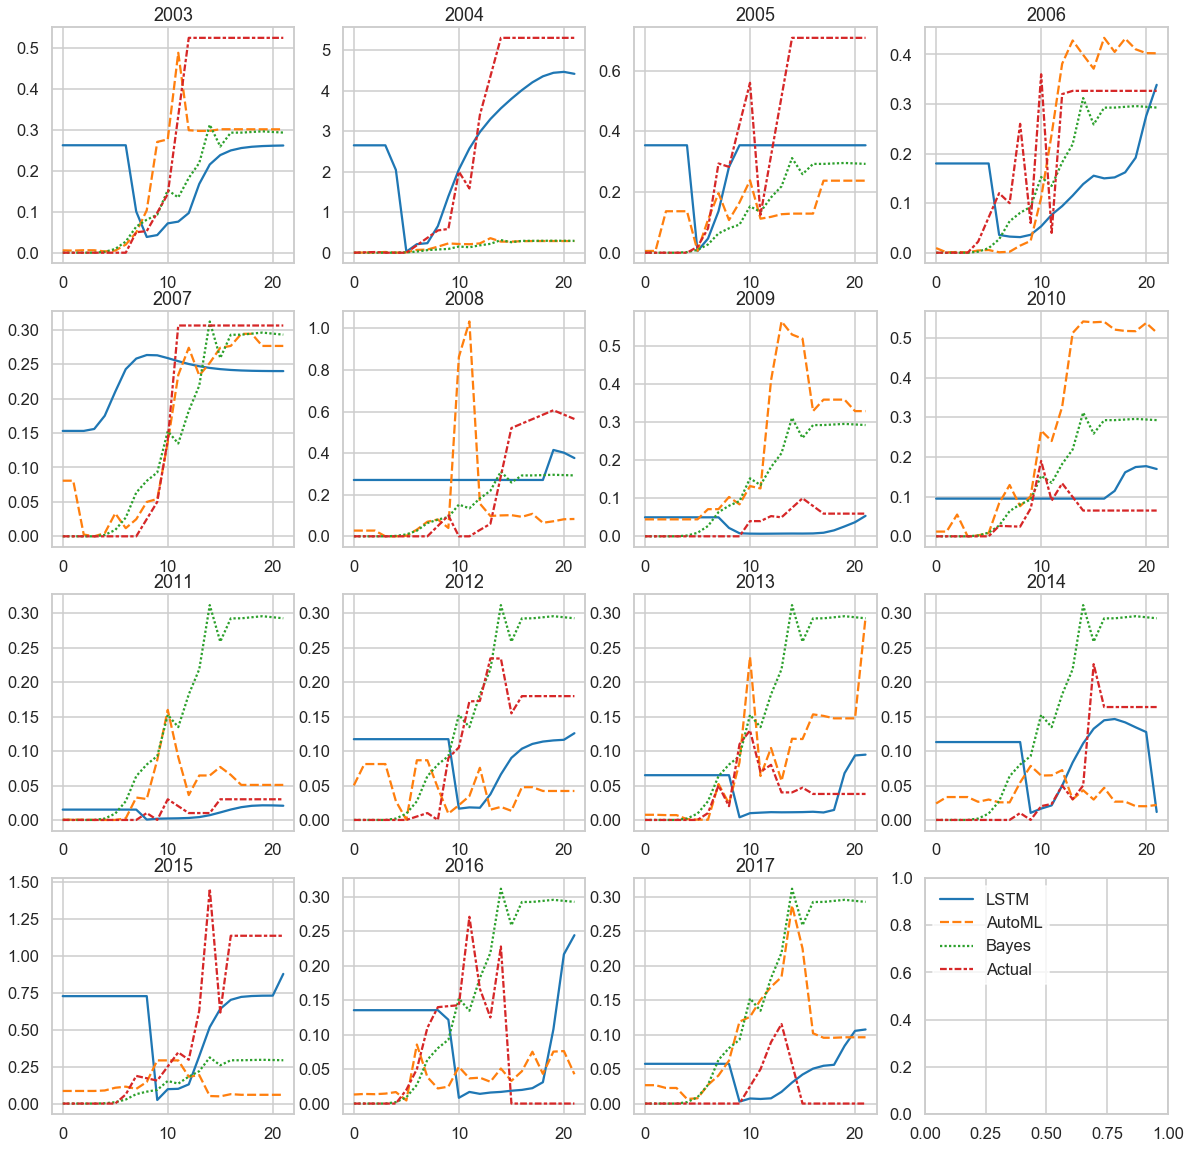

In [164]:
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(20)
ymax = 0

for j, year in enumerate(analysis_years):
    jx = np.unravel_index(j, ax.shape)
    
    plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })
    
    p = sns.lineplot(data=plotdata, ax=ax[jx])
    
    ax[jx].set_title(year)
    handles, labels = ax[jx].get_legend_handles_labels()
    p.legend_.remove()

ax[np.unravel_index(15, ax.shape)].legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')

In [193]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('poster')

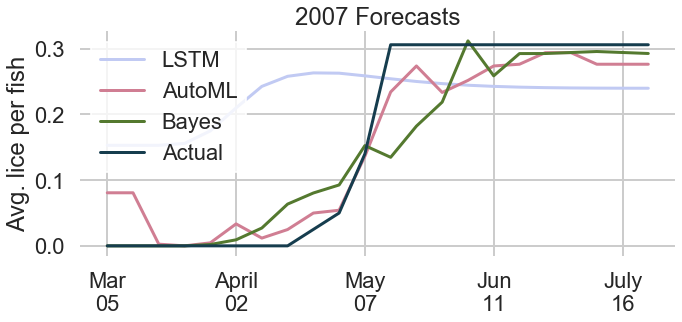

In [201]:
year = 2007
plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })

fig, ax = plt.subplots()
p = sns.lineplot(data=plotdata, ax=ax, palette='cubehelix_r', dashes=False, lw=3)
p.legend

# set aesthetics
ax.set_ylabel('Avg. lice per fish')
ax.set_xlabel('')
plt.box(False)
ax.set_xticks([0, 5, 10, 15, 20], minor=False)
ax.set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax.set_title('2007 Forecasts')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()
fig.savefig('2007_forecasts.png', dpi=900, transparent=True)

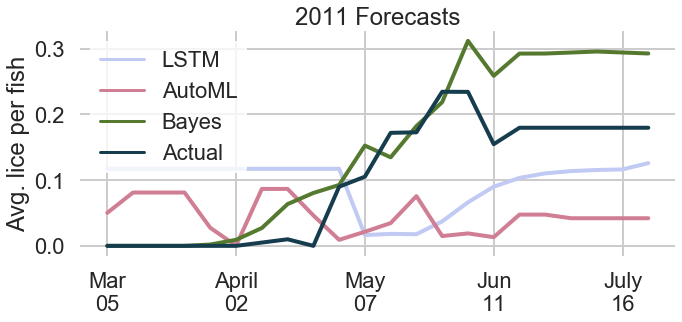

In [200]:
year = 2012
plotdata = pd.DataFrame({
        'LSTM': retrieve_dates_lstm(list(chain.from_iterable(lstm_info[f'{year}']['test_predictions_scaled']))),
        'AutoML': retrieve_dates_automl(automl_info[f'{year}']['predictions']),
        'Bayes': bayes_info[f'{year}']['test_predictions'],
        'Actual': actual_info[f'{year}'],
    })

fig, ax = plt.subplots()
p = sns.lineplot(data=plotdata, ax=ax, palette='cubehelix_r', dashes=False, lw=4)
p.legend

# set aesthetics
ax.set_ylabel('Avg. lice per fish')
ax.set_xlabel('')
plt.box(False)
ax.set_xticks([0, 5, 10, 15, 20], minor=False)
ax.set_xticklabels(['Mar\n05', 'April\n02', 'May\n07', 'Jun\n11', 'July\n16'])

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='upper left', facecolor='white', edgecolor='white')
ax.set_title('2011 Forecasts')
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()
fig.savefig('2012_forecasts.png', dpi=900, transparent=True)

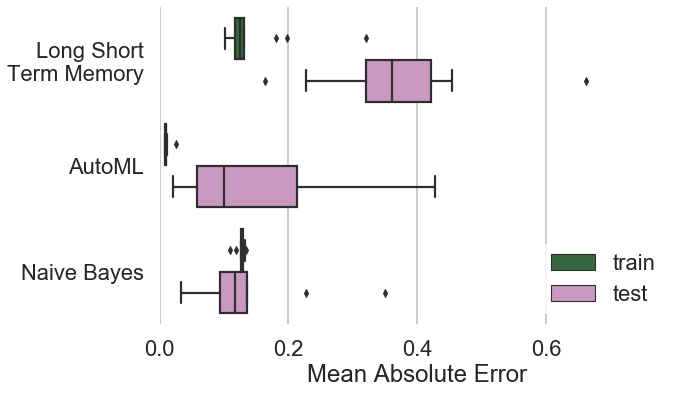

In [202]:
# prep data
lstm_train_mae = [lstm_info[key]['train_mae'] for key in lstm_info.keys()]
automl_train_mae = [automl_info[key]['train_mae'] for key in automl_info.keys()]
bayes_train_mae = [bayes_info[key]['train_mae'] for key in bayes_info.keys()]

lstm_test_mae = [lstm_info[key]['test_mae'] for key in lstm_info.keys()]
automl_test_mae = [automl_info[key]['mae'] for key in automl_info.keys()]
bayes_test_mae = [bayes_info[key]['test_mae'] for key in bayes_info.keys()]

train_test = ['train'] * 15 + ['test'] * 15

train = pd.DataFrame({
    'Long Short\nTerm Memory': lstm_train_mae + lstm_test_mae,
    'AutoML': automl_train_mae + automl_test_mae,
    'Naive Bayes': bayes_train_mae + bayes_test_mae,
    'train_test': train_test
})
plotdata = pd.melt(train, id_vars=['train_test'], value_vars=['Long Short\nTerm Memory', 'AutoML', 'Naive Bayes'])
# value_vars=['lstm', 'automl', 'bayes'])
# plot
fig, ax = plt.subplots()

# base plot
ax = sns.boxplot(x="value", y="variable",
                 hue='train_test', data=plotdata,
                 linewidth=2.2, palette='cubehelix')
# sns.stripplot(x='value', y='variable', 
#               hue='train_test', data=plotdata,
#               ax=ax, orient='h', color=".5", dodge=True)

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

fig.set_figwidth(10)
fig.set_figheight(6)
plt.tight_layout()
fig.savefig('residuals.png', dpi=900, transparent=True)